# Data Analysis By Muhammed Fazal

## Title:- Data Science Job Salaries Analysis

In [3]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load and Understand data

In [5]:
#import datasets
data=pd.read_csv("Data Science Job Salaries.csv", index_col=0)

In [6]:
#Determine the shape
data.shape

(607, 11)

In [7]:
#first 5 rows
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
#datatype of all columns
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Data Cleaning

In [10]:
# Handle Missing Values
# verify no missing values remain
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
#detect duplicates
data.duplicated().sum()

42

In [12]:
#drop duplications
data.drop_duplicates(inplace=True)

In [13]:
#check if any duplicate
data.duplicated().sum()

0

## Data Preprocessing

In [15]:
# Change abbreviations to complete values
!pip install -q country_converter


In [16]:
import country_converter
cc = country_converter.CountryConverter()
data['company_location'] = cc.convert(data['company_location'],
to='name_short')
data['employee_residence'] = cc.convert(data['employee_residence'],
to='name_short')

In [17]:
# experience level
data['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

In [18]:
data['experience_level'] = data['experience_level'].map({
'SE': 'Senior',
'MI': 'Mid',
'EN': 'Entry',
'EX': 'Executive'
})

In [19]:
# employment type
data['employment_type'].value_counts()

employment_type
FT    546
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [20]:
data['employment_type'] = data['employment_type'].map({
'FT': 'Full-time',
'PT': 'Part-time',
'CT': 'Contract',
'FL': 'Freelance'
})


In [21]:
# company size
data['company_size'].value_counts()

company_size
M    290
L    193
S     82
Name: count, dtype: int64

In [22]:
data['company_size'] = data['company_size'].map({
'S': 'Small',
'M': 'Medium',
'L': 'Large'
})

In [23]:
# drop salary and salary_currency features (salary_in_usd isenough to keep on)
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)
# rename salary_in_usd to salary
data.rename(columns={'salary_in_usd': 'salary'}, inplace=True)


In [24]:
data['work_year'].value_counts()

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64

In [25]:
# remote_ratio variable
data['remote_ratio'].value_counts()


remote_ratio
100    346
0      121
50      98
Name: count, dtype: int64

In [26]:
# renmame remote_ratio to job_type
data.rename(columns={'remote_ratio': 'job_type'}, inplace=True)
# change 100 to remote, 0 to onsite, 50 to hybrid
data['job_type'] = data['job_type'].map({
100: 'remote',
0: 'onsite',
50: 'hybrid',
})


In [27]:
data['job_type'].value_counts()

job_type
remote    346
onsite    121
hybrid     98
Name: count, dtype: int64

In [28]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [29]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,hybrid,United States,Large


# Analysis

C:\Users\fasal\AppData\Local\Temp\ipykernel_16804\2484252966.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['salary'])


Text(0.5, 1.0, 'Salary Distribution')

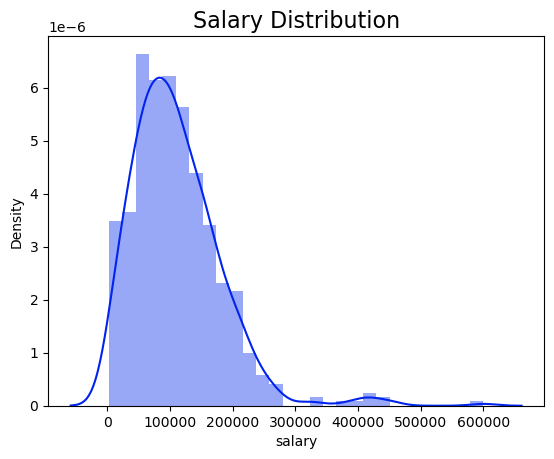

In [31]:
# Salary distribution
sns.set_palette('winter')
ax = sns.distplot(data['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

#### Salary VS experience level

In [33]:
# mean salary of employees with different experience levels
mean_s_exp_lv = data.groupby('experience_level')['salary'].mean().sort_values()
mean_s_exp_lv


experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary, dtype: float64

In [34]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Experience Level VS Salary')

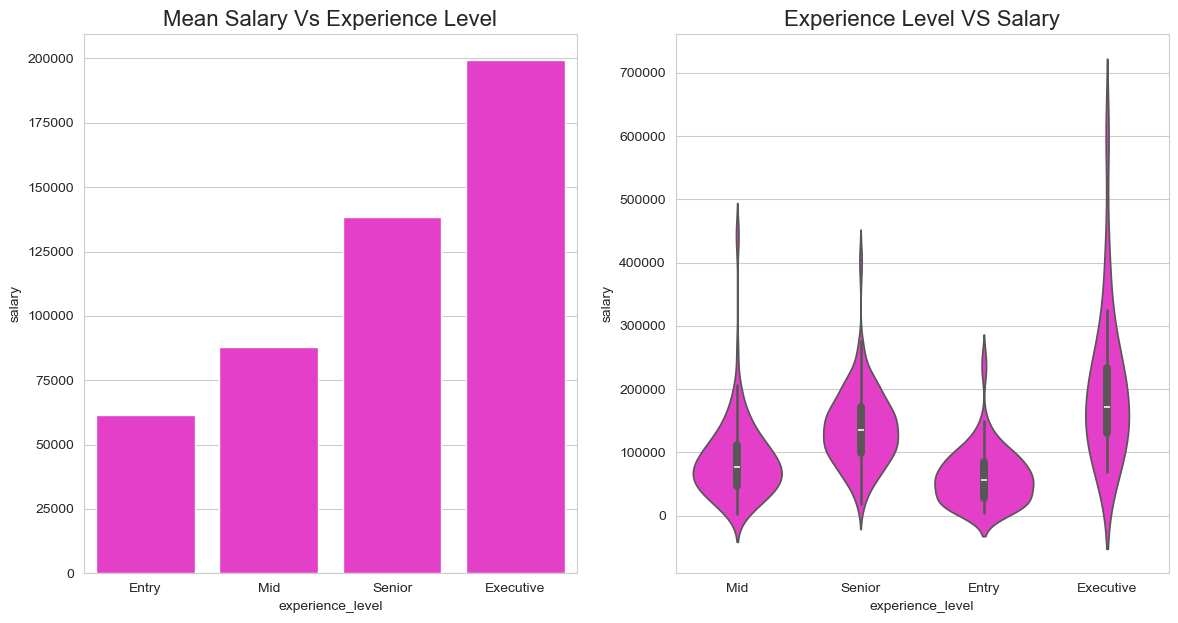

In [35]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title('Mean Salary Vs Experience Level',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=data, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary',
fontdict={'fontsize': 16})

## Experience Level VS Salary:

 We see that data scientists with the experience level of Executive have the highest
 mean salary, about 200,000 annualy, and those with Entry level have the lowest
 mean salary, about 60,000. 

## Salary VS Employment Type

In [39]:
# mean salary of employees with different employment types
mean_s_emp_type = data.groupby('employment_type')['salary'].mean().sort_values()
mean_s_emp_type

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    111811.838828
Contract     184575.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

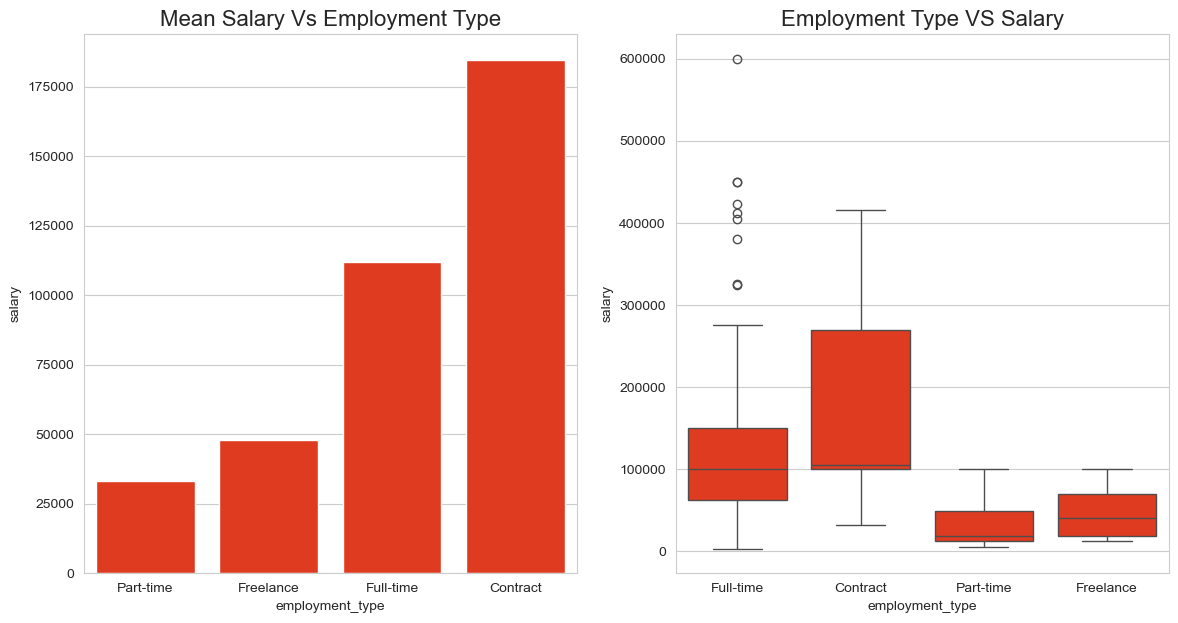

In [40]:
plt.figure(figsize=(14, 7))
sns.set_palette('autumn')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('Mean Salary Vs Employment Type',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=data, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize':
16})

## Employment Type VS Salary:

We see that data scientists with an employment type of contract have the highest
mean salary, about 180,000, and those who work part-time have the lowest mean
salary, about 30,000 annualy

## Salary VS Company Size

In [44]:
# mean salary of employees from different company sizes
mean_s_cmp_size = data.groupby('company_size')['salary'].mean().sort_values()
mean_s_cmp_size

company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

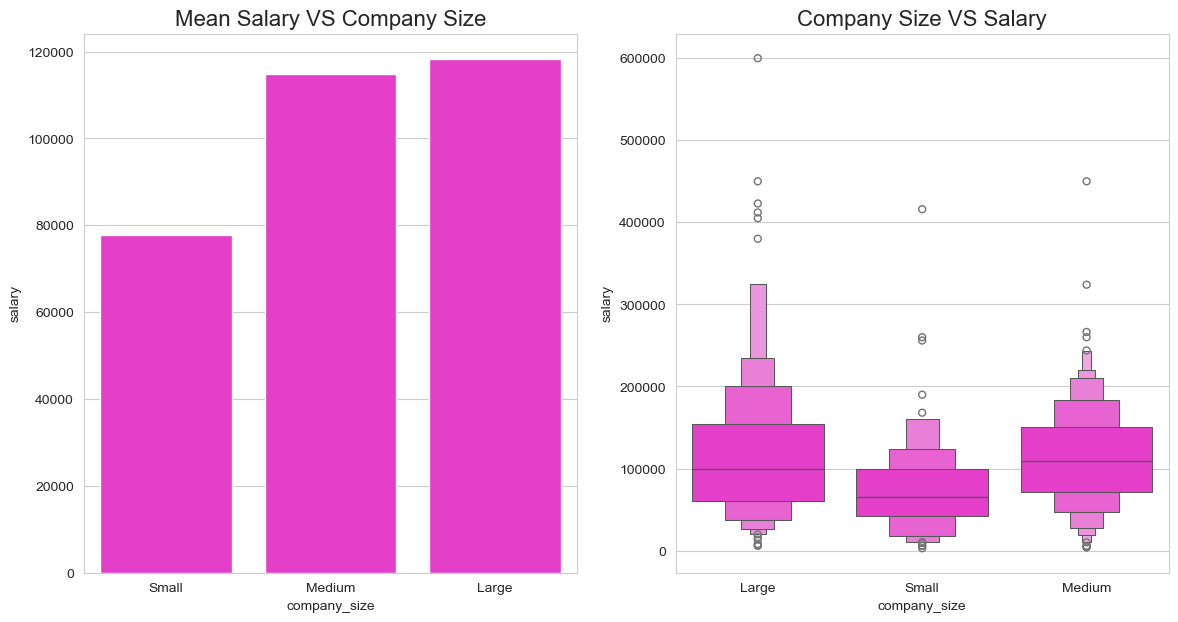

In [45]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.boxenplot(data=data, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize':16})

## Company Size VS Salary:

We see that data scientists working at Large companies are paid the highest mean
salary, about 120,000, and those who work at small ones have the lowest mean
salary, about 75,000 annualy.

## Salary VS Job type (remote, hybrid, onsite)

In [49]:
# mean salary of employees with different job types
mean_s_jtype = data.groupby('job_type')['salary'].mean().sort_values()
mean_s_jtype

job_type
hybrid     80721.897959
onsite    105785.404959
remote    120763.190751
Name: salary, dtype: float64

plt.figure(figsize=(14, 7))
sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize':16})
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=data, x='job_type', y='salary')
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})


### Job Type (remote, on-site or hybrid) VS Salary:

We see that data scientists working remotely (about $120,000) have a higher mean
salary than those who work on-site (about 105,000), and hybrid workers have a
lower mean salary than former two (about 80,000) annualy.

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

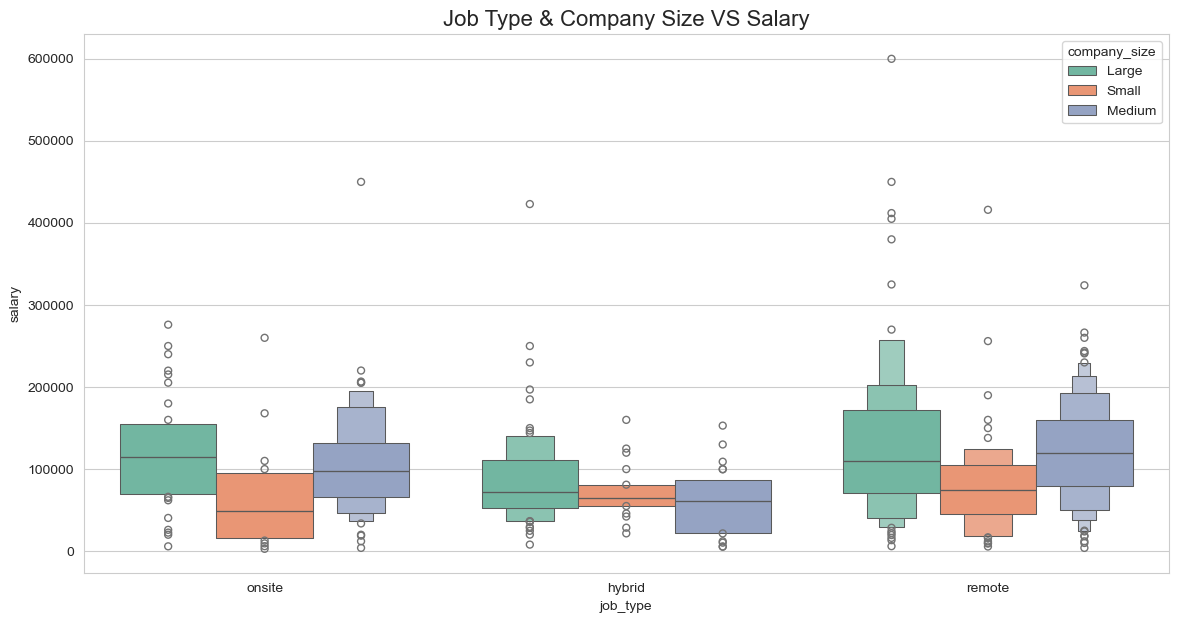

In [53]:
# job type and company size VS salary
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=data , x='job_type', y='salary',
hue='company_size')
ax.set_title('Job Type & Company Size VS Salary',
fontdict={'fontsize': 16})

#### I would prefer to work remotely at a large company to get paid higher.

### Job Types and Experience Level distributions (Pie)

Text(0, 0.5, '')

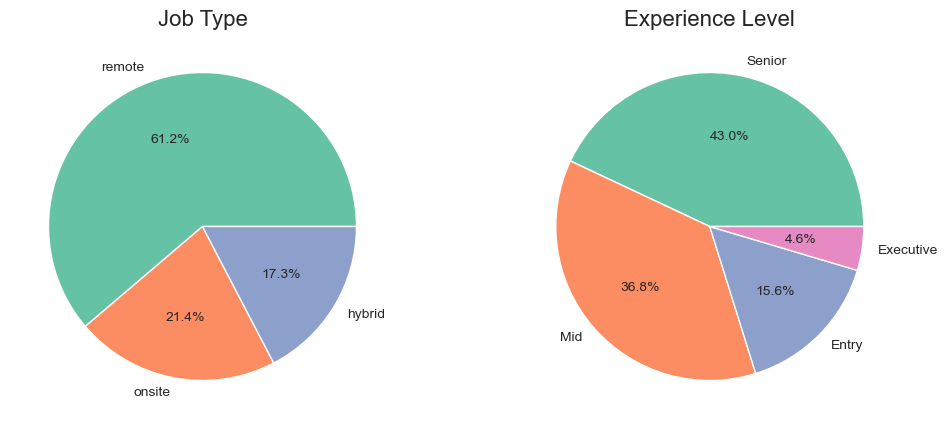

In [56]:
plt.figure(figsize=(12, 5))
sns.set_palette('Set2')
# job types
plt.subplot(1,2,1)
ax = data['job_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Job Type', fontdict={'fontsize': 16})
ax.set_ylabel('')
# experience levels
plt.subplot(1,2,2)
ax = data['experience_level'].value_counts().plot(kind='pie',
autopct='%1.1f%%')
ax.set_title('Experience Level', fontdict={'fontsize': 16})
ax.set_ylabel('')

 ● Remote jobs have the highest number of openings, %.
● Share of Job openings for employees with an experience level of Senior is the
the highest here, %

### Top 10 Data Science Roles

In [59]:
# top 10 data science roles according to mean salary
top_ds_roles = data.groupby('job_title')['salary'].mean().sort_values(ascending= False)
# ignore those ds roles which happened only once
top_ds_roles_ =pd.Series(data=list(top_ds_roles.index)).apply(lambda x: x if
list(data['job_title']).count(x) > 1 else 0)
top_ds_roles_that_happened_gt_1 = top_ds_roles_[top_ds_roles_!= 0][:9]
top_ds_roles_that_happened_gt_1 =top_ds_roles[top_ds_roles_that_happened_gt_1]
top_ds_roles_that_happened_gt_1


job_title
Principal Data Engineer       328333.333333
Financial Data Analyst        275000.000000
Principal Data Scientist      215242.428571
Director of Data Science      195074.000000
Data Architect                177873.909091
Applied Data Scientist        175655.000000
Analytics Engineer            175000.000000
Head of Data                  160162.600000
Machine Learning Scientist    158412.500000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

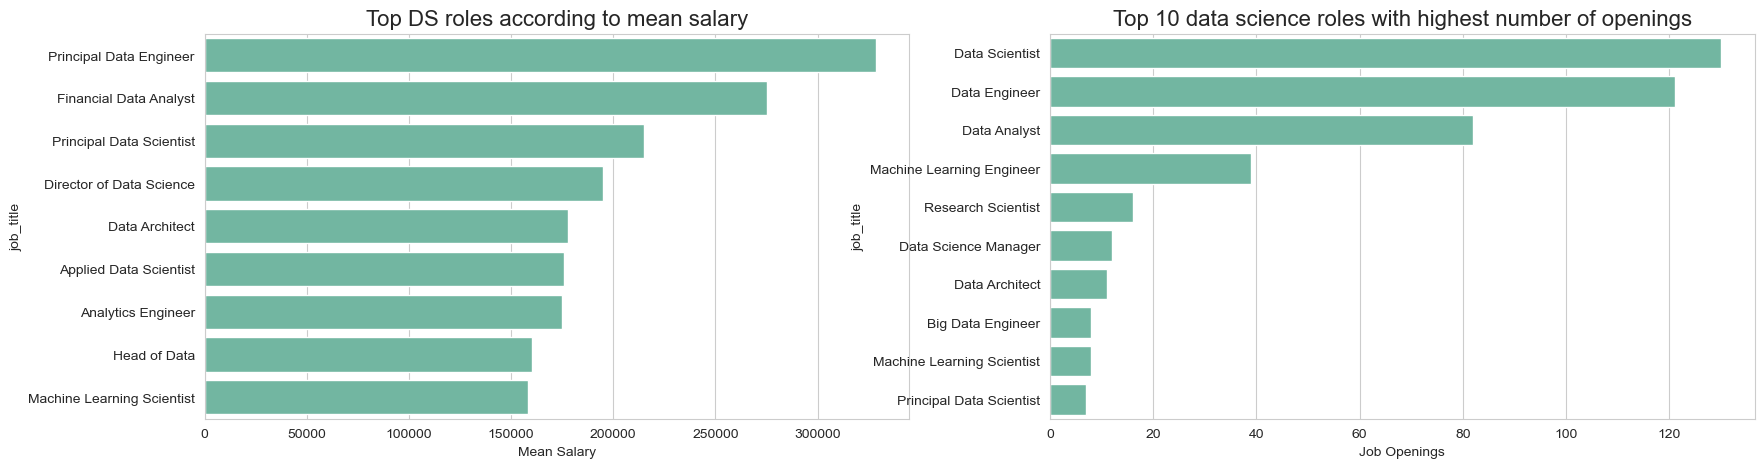

In [60]:
plt.figure(figsize=(20, 5))
# top 10 data science roles according to mean salary
plt.subplot(1, 2, 1)
top_ds_roles = top_ds_roles_that_happened_gt_1
ax = sns.barplot(y=top_ds_roles.index, x=top_ds_roles)
ax.set_xlabel('Mean Salary')
ax.set_title('Top DS roles according to mean salary',
fontdict={'fontsize': 16})
# top 10 data science roles with highest number of openings
plt.subplot(1, 2, 2)
top_dr = data['job_title'].value_counts()[:10]
ax = sns.barplot(x=top_dr, y=top_dr.index)
ax.set_xlabel('Job Openings')
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16})

● Principal Data Engineer, Financial Data Analyst and Principal Data
Scientist are the highest paid roles according to this dataset with mean annual
salaries of $405,000, $328,333 and $275,000 respectively.

● Data Scientist, Data Engineer and Data Analyst are the top three Data
Science roles with highest number of openings.

## Top 10 campany-locations

In [63]:
# top 10 company-locations according to mean salary
top_cmp_locations = data.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_locations

company_location
Russia                  157500.000000
United States           144292.993711
New Zealand             125000.000000
Israel                  119059.000000
Japan                   114127.333333
Australia               108042.666667
Canada                  100121.857143
Iraq                    100000.000000
United Arab Emirates    100000.000000
Algeria                 100000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

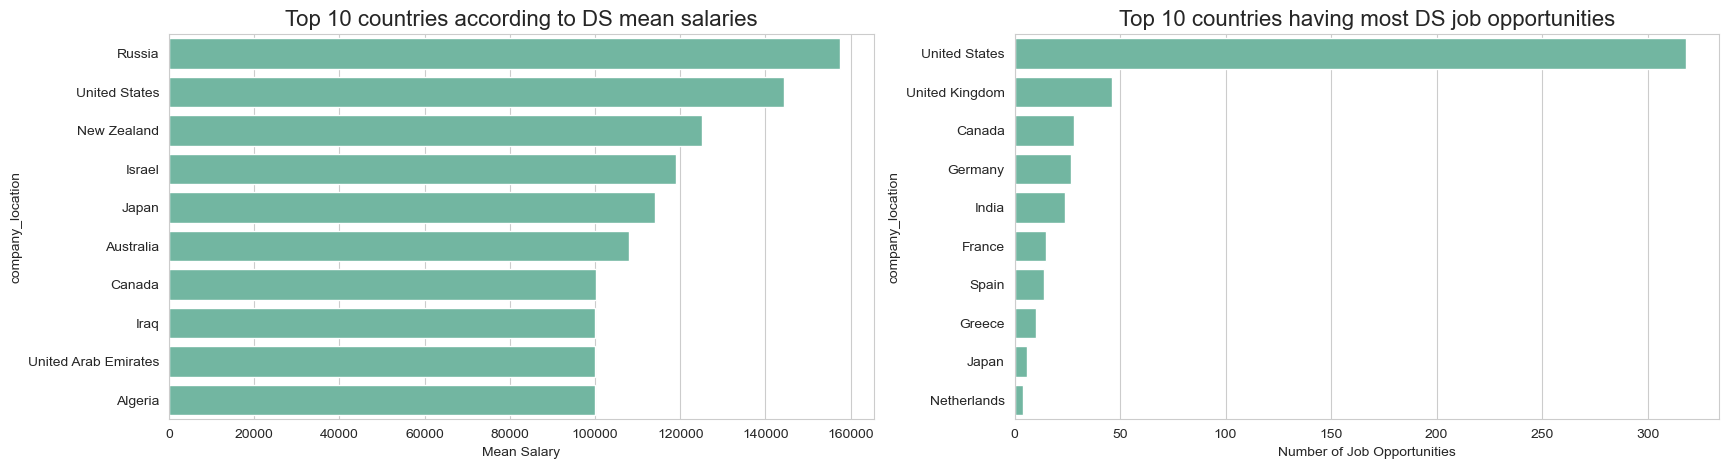

In [64]:
plt.figure(figsize=(20, 5))
# top 10 company-locations according to mean salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_cmp_locations.index,
x=top_cmp_locations)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 countries according to DS mean salaries',fontdict={'fontsize': 16})
# top 10 company-locations having most job opportunities
top_cl = data['company_location'].value_counts()[:10]
plt.subplot(1, 2, 2)
ax = sns.barplot(x=top_cl, y=top_cl.index)
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

● Russia, the United States and New Zealand are the highest paying countries
for data science roles according to this dataset, paying mean annual salaries of
$157,500, $144,055 and $125,000 respectively.
● The US, The UK and Canada are the top three countries offering highest
number of Data Science job.

## Top 10 Employee-residence

In [67]:
# top 10 employee-residence according to mean salary
top_emp_residence = data.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)[:10]
top_emp_residence

employee_residence
Malaysia         200000.000000
Puerto Rico      160000.000000
United States    150094.918644
New Zealand      125000.000000
Switzerland      122346.000000
Australia        108042.666667
Russia           105750.000000
Singapore        104176.500000
Japan            103537.714286
Algeria          100000.000000
Name: salary, dtype: float64

Text(0.5, 0, 'Job Openings')

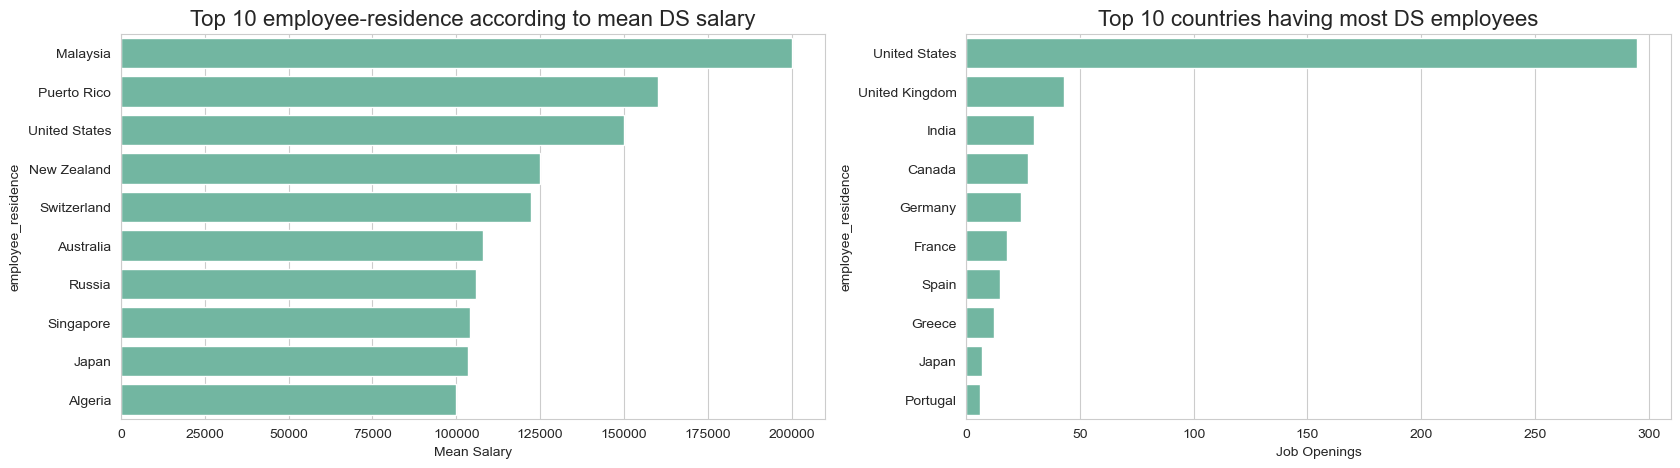

In [68]:
plt.figure(figsize=(20, 5))
# top 10 employee-residence according to mean salary
plt.subplot(1,2,1)
ax = sns.barplot(y=top_emp_residence.index,
x=top_emp_residence)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 employee-residence according to mean DS salary', fontdict={'fontsize': 16})
# top 10 employee-residence according to number of job openings
plt.subplot(1,2,2)
top_er = data['employee_residence'].value_counts()[:10]
ax = sns.barplot(x=top_er, y=top_er.index)
ax.set_title('Top 10 countries having most DS employees',
fontdict={'fontsize': 16})
ax.set_xlabel('Job Openings')

● Malaysia, Puerto Rico and the US are the highest paid employee-residences
(countries where employees live) in data science roles according to this
dataset, being paid mean annual salaries of $200,000, $160,000 and $149,194
respectively.
● The US, the UK and India are the top three countires securing most Data
Sceince job.


## Company Size VS Job Types Counts

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

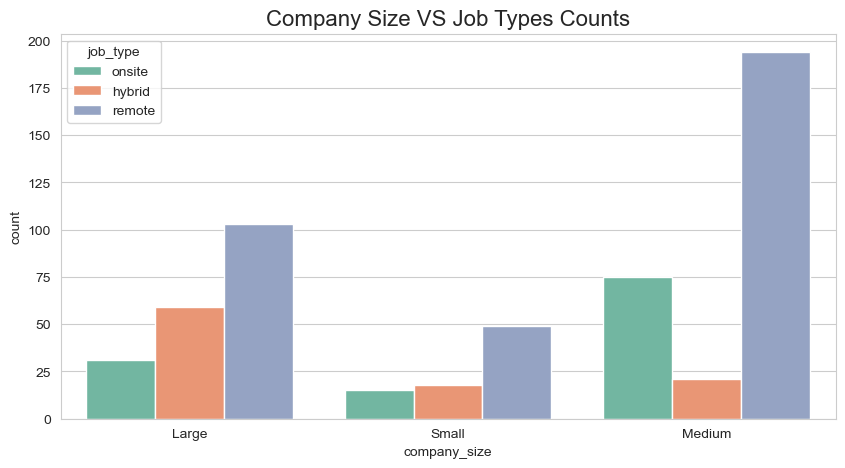

In [71]:
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
ax = sns.countplot(data=data, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts',
fontdict={'fontsize': 16})

In all companies, the number of remote workers is higher than that of hybrid and
on-site. Furthermore, the number of hybrid workers in small and large companies is
higher than that of on-site, whereas in medium-sized companies, more people
work on-site than hybrid.

In [118]:
data.to_csv("DS_cleaned.csv")